# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 6318 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (   1 of 6318) |              | Elapsed Time: 0:00:27 ETA:  2 days, 0:22:17

  0% (  63 of 6318) |                      | Elapsed Time: 0:00:28 ETA:  0:01:14

  1% (  79 of 6318) |                      | Elapsed Time: 0:00:28 ETA:  0:01:12

  2% ( 143 of 6318) |                      | Elapsed Time: 0:00:29 ETA:  0:01:10

  2% ( 158 of 6318) |                      | Elapsed Time: 0:00:30 ETA:  0:01:11

  3% ( 237 of 6318) |                      | Elapsed Time: 0:00:31 ETA:  0:01:07

  5% ( 316 of 6318) |#                     | Elapsed Time: 0:00:32 ETA:  0:01:05

  5% ( 374 of 6318) |#                     | Elapsed Time: 0:00:33 ETA:  0:01:05

  6% ( 395 of 6318) |#                     | Elapsed Time: 0:00:33 ETA:  0:01:05

  7% ( 456 of 6318) |#                     | Elapsed Time: 0:00:34 ETA:  0:01:05

  7% ( 474 of 6318) |#                     | Elapsed Time: 0:00:35 ETA:  0:01:05

  8% ( 538 of 6318) |#                     | Elapsed Time: 0:00:36 ETA:  0:01:03

  8% ( 553 of 6318) |#                     | Elapsed Time: 0:00:36 ETA:  0:01:04

  9% ( 617 of 6318) |##                    | Elapsed Time: 0:00:37 ETA:  0:01:03

 10% ( 632 of 6318) |##                    | Elapsed Time: 0:00:37 ETA:  0:01:05

 11% ( 696 of 6318) |##                    | Elapsed Time: 0:00:38 ETA:  0:01:04

 11% ( 711 of 6318) |##                    | Elapsed Time: 0:00:38 ETA:  0:01:02

 12% ( 774 of 6318) |##                    | Elapsed Time: 0:00:39 ETA:  0:01:01

 12% ( 790 of 6318) |##                    | Elapsed Time: 0:00:40 ETA:  0:01:00

 13% ( 869 of 6318) |###                   | Elapsed Time: 0:00:41 ETA:  0:00:58

 15% ( 948 of 6318) |###                   | Elapsed Time: 0:00:42 ETA:  0:00:56

 16% (1027 of 6318) |###                   | Elapsed Time: 0:00:43 ETA:  0:00:52

 17% (1106 of 6318) |###                   | Elapsed Time: 0:00:44 ETA:  0:00:49

 18% (1167 of 6318) |####                  | Elapsed Time: 0:00:45 ETA:  0:00:49

 18% (1185 of 6318) |####                  | Elapsed Time: 0:00:46 ETA:  0:00:50

 20% (1264 of 6318) |####                  | Elapsed Time: 0:00:47 ETA:  0:00:49

 20% (1324 of 6318) |####                  | Elapsed Time: 0:00:48 ETA:  0:00:49

 21% (1343 of 6318) |####                  | Elapsed Time: 0:00:48 ETA:  0:00:50

 22% (1422 of 6318) |####                  | Elapsed Time: 0:00:49 ETA:  0:00:49

 23% (1501 of 6318) |#####                 | Elapsed Time: 0:00:50 ETA:  0:00:46

 25% (1580 of 6318) |#####                 | Elapsed Time: 0:00:52 ETA:  0:00:43

 26% (1659 of 6318) |#####                 | Elapsed Time: 0:00:53 ETA:  0:00:40

 27% (1738 of 6318) |######                | Elapsed Time: 0:00:54 ETA:  0:00:39

 28% (1799 of 6318) |######                | Elapsed Time: 0:00:55 ETA:  0:00:39

 28% (1817 of 6318) |######                | Elapsed Time: 0:00:55 ETA:  0:00:40

 29% (1883 of 6318) |######                | Elapsed Time: 0:00:56 ETA:  0:00:39

 30% (1896 of 6318) |######                | Elapsed Time: 0:00:57 ETA:  0:00:40

 31% (1975 of 6318) |######                | Elapsed Time: 0:00:58 ETA:  0:00:38

 32% (2054 of 6318) |#######               | Elapsed Time: 0:00:59 ETA:  0:00:36

 33% (2133 of 6318) |#######               | Elapsed Time: 0:01:00 ETA:  0:00:32

 34% (2185 of 6318) |#######               | Elapsed Time: 0:01:02 ETA:  0:00:45

 35% (2212 of 6318) |#######               | Elapsed Time: 0:01:02 ETA:  0:00:46

 36% (2291 of 6318) |#######               | Elapsed Time: 0:01:03 ETA:  0:00:44

 37% (2370 of 6318) |########              | Elapsed Time: 0:01:04 ETA:  0:00:44

 38% (2434 of 6318) |########              | Elapsed Time: 0:01:05 ETA:  0:00:42

 38% (2449 of 6318) |########              | Elapsed Time: 0:01:05 ETA:  0:00:45

 40% (2528 of 6318) |########              | Elapsed Time: 0:01:07 ETA:  0:00:25

 41% (2607 of 6318) |#########             | Elapsed Time: 0:01:08 ETA:  0:00:25

 42% (2686 of 6318) |#########             | Elapsed Time: 0:01:09 ETA:  0:00:23

 43% (2765 of 6318) |#########             | Elapsed Time: 0:01:10 ETA:  0:00:21

 45% (2844 of 6318) |#########             | Elapsed Time: 0:01:11 ETA:  0:00:20

 46% (2923 of 6318) |##########            | Elapsed Time: 0:01:12 ETA:  0:00:20

 47% (3002 of 6318) |##########            | Elapsed Time: 0:01:14 ETA:  0:00:19

 48% (3064 of 6318) |##########            | Elapsed Time: 0:01:15 ETA:  0:00:19

 48% (3081 of 6318) |##########            | Elapsed Time: 0:01:15 ETA:  0:00:19

 49% (3147 of 6318) |##########            | Elapsed Time: 0:01:16 ETA:  0:00:18

 50% (3159 of 6318) |###########           | Elapsed Time: 0:01:16 ETA:  0:00:19

 51% (3238 of 6318) |###########           | Elapsed Time: 0:01:17 ETA:  0:00:17

 52% (3317 of 6318) |###########           | Elapsed Time: 0:01:18 ETA:  0:00:16

 53% (3396 of 6318) |###########           | Elapsed Time: 0:01:19 ETA:  0:00:13

 55% (3475 of 6318) |############          | Elapsed Time: 0:01:21 ETA:  0:00:11

 56% (3554 of 6318) |############          | Elapsed Time: 0:01:22 ETA:  0:00:08

 57% (3633 of 6318) |############          | Elapsed Time: 0:01:23 ETA:  0:00:08

 58% (3712 of 6318) |############          | Elapsed Time: 0:01:24 ETA:  0:00:05

 60% (3791 of 6318) |#############         | Elapsed Time: 0:01:25 ETA:  0:00:05

 61% (3870 of 6318) |#############         | Elapsed Time: 0:01:26 ETA:  0:00:03

 62% (3936 of 6318) |#############         | Elapsed Time: 0:01:27 ETA:  0:00:03

 62% (3949 of 6318) |#############         | Elapsed Time: 0:01:27 ETA:  0:00:05

 63% (4028 of 6318) |##############        | Elapsed Time: 0:01:29 ETA:  0:00:04

 64% (4094 of 6318) |##############        | Elapsed Time: 0:01:30 ETA:  0:00:04

 65% (4107 of 6318) |##############        | Elapsed Time: 0:01:30 ETA:  0:00:04

 66% (4186 of 6318) |##############        | Elapsed Time: 0:01:31 ETA:  0:00:03

 67% (4265 of 6318) |##############        | Elapsed Time: 0:01:32 ETA:  0:00:02

 68% (4344 of 6318) |###############       | Elapsed Time: 0:01:33 ETA:  0:00:00

 70% (4423 of 6318) |###############       | Elapsed Time: 0:01:35 ETA:  0:00:00

 71% (4502 of 6318) |###############       | Elapsed Time: 0:01:36 ETA:  0:00:00

 72% (4581 of 6318) |###############       | Elapsed Time: 0:01:37 ETA:  0:00:00

 73% (4644 of 6318) |################      | Elapsed Time: 0:01:38 ETA:  0:00:00

 73% (4660 of 6318) |################      | Elapsed Time: 0:01:38 ETA:  0:00:00

 75% (4739 of 6318) |################      | Elapsed Time: 0:01:39 ETA:  0:00:00

 76% (4818 of 6318) |################      | Elapsed Time: 0:01:40 ETA:  0:00:00

 77% (4879 of 6318) |################      | Elapsed Time: 0:01:41 ETA:  0:00:00

 77% (4897 of 6318) |#################     | Elapsed Time: 0:01:42 ETA:  0:00:00

 78% (4963 of 6318) |#################     | Elapsed Time: 0:01:43 ETA:  0:00:00

 78% (4976 of 6318) |#################     | Elapsed Time: 0:01:43 ETA:  0:00:00

 79% (5039 of 6318) |#################     | Elapsed Time: 0:01:44 ETA:  0:00:00

 80% (5055 of 6318) |#################     | Elapsed Time: 0:01:44 ETA:  0:00:00

 81% (5134 of 6318) |#################     | Elapsed Time: 0:01:45 ETA:  0:00:00

 82% (5194 of 6318) |##################    | Elapsed Time: 0:01:47 ETA:  0:00:00

 82% (5213 of 6318) |##################    | Elapsed Time: 0:01:47 ETA:  0:00:00

 83% (5292 of 6318) |##################    | Elapsed Time: 0:01:48 ETA:  0:00:00

 85% (5371 of 6318) |##################    | Elapsed Time: 0:01:49 ETA:  0:00:00

 86% (5437 of 6318) |##################    | Elapsed Time: 0:01:50 ETA:  0:00:00

 86% (5450 of 6318) |##################    | Elapsed Time: 0:01:50 ETA:  0:00:00

 86% (5481 of 6318) |###################   | Elapsed Time: 0:01:52 ETA:  0:00:06

 87% (5529 of 6318) |###################   | Elapsed Time: 0:01:53 ETA:  0:00:05

 88% (5608 of 6318) |###################   | Elapsed Time: 0:01:54 ETA:  0:00:05

 89% (5673 of 6318) |###################   | Elapsed Time: 0:01:55 ETA:  0:00:01

 90% (5687 of 6318) |###################   | Elapsed Time: 0:01:55 ETA:  0:00:05

 91% (5766 of 6318) |####################  | Elapsed Time: 0:01:56 ETA:  0:00:02

 92% (5845 of 6318) |####################  | Elapsed Time: 0:01:57 ETA:  0:00:00

 93% (5910 of 6318) |####################  | Elapsed Time: 0:01:58 ETA:  0:00:00

 93% (5924 of 6318) |####################  | Elapsed Time: 0:01:59 ETA:  0:00:00

 94% (5986 of 6318) |####################  | Elapsed Time: 0:02:00 ETA:  0:00:00

 95% (6003 of 6318) |####################  | Elapsed Time: 0:02:00 ETA:  0:00:00

 96% (6069 of 6318) |##################### | Elapsed Time: 0:02:01 ETA:  0:00:00

 96% (6082 of 6318) |##################### | Elapsed Time: 0:02:01 ETA:  0:00:00

 97% (6161 of 6318) |##################### | Elapsed Time: 0:02:02 ETA:  0:00:00

 98% (6227 of 6318) |##################### | Elapsed Time: 0:02:03 ETA:  0:00:00

 98% (6240 of 6318) |##################### | Elapsed Time: 0:02:04 ETA:  0:00:00

 99% (6302 of 6318) |##################### | Elapsed Time: 0:02:05 ETA:  0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:02:05 Time: 0:02:05


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

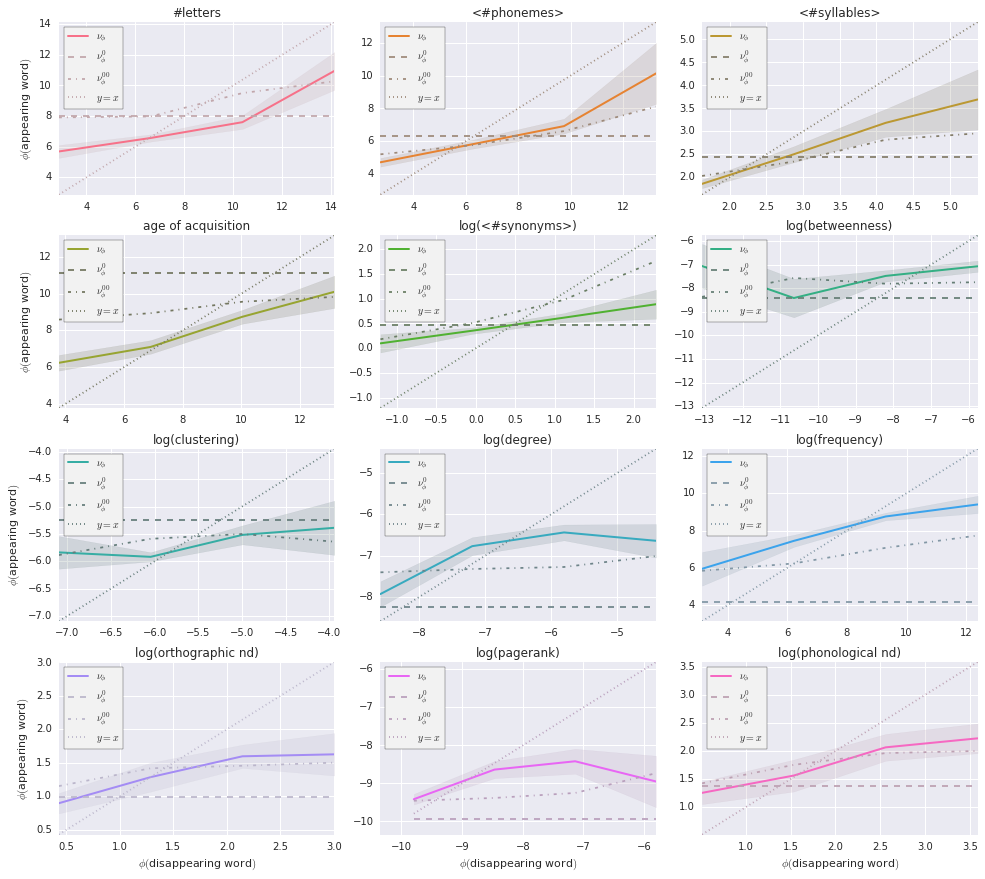

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

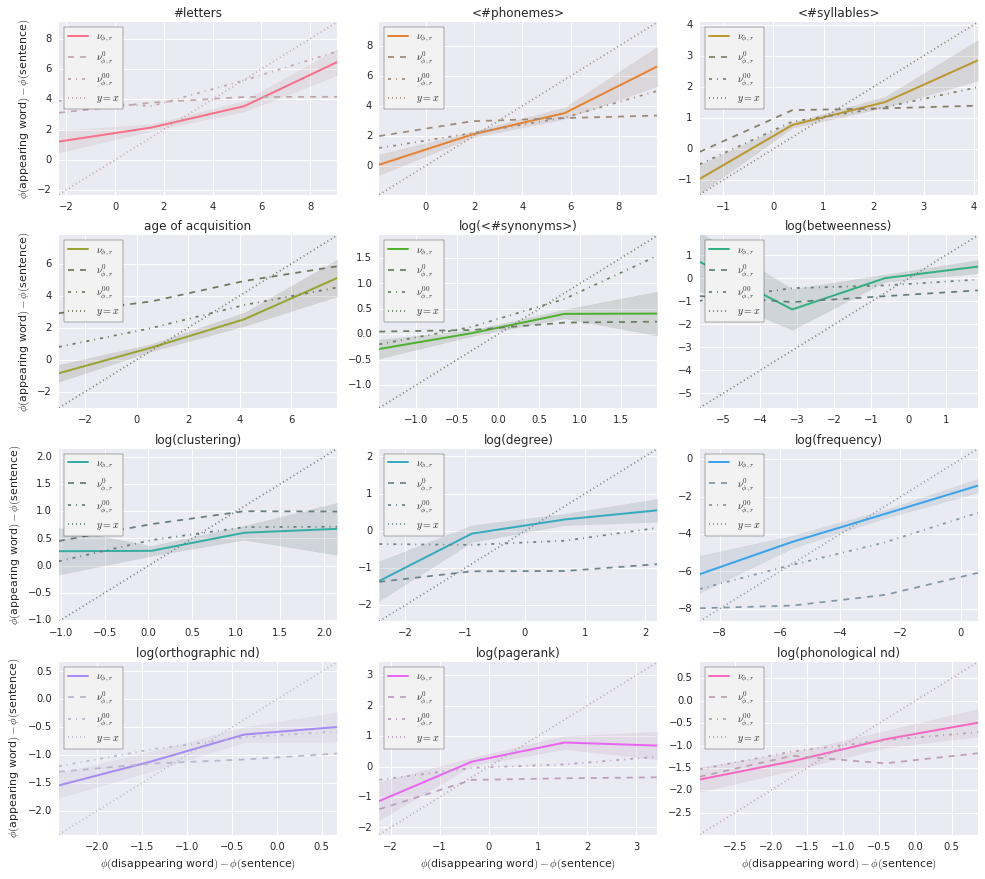

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

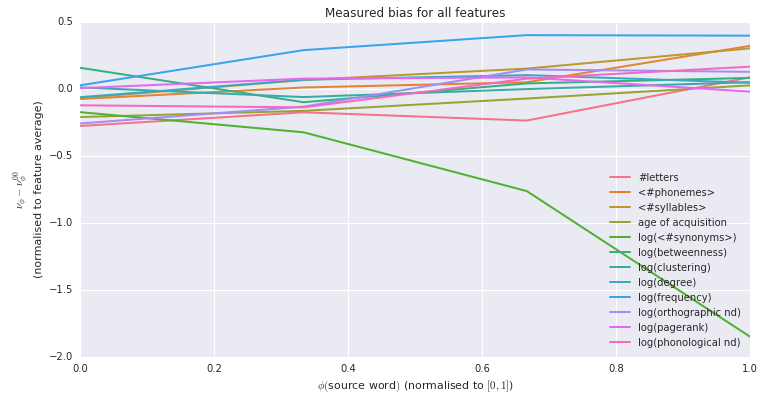

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

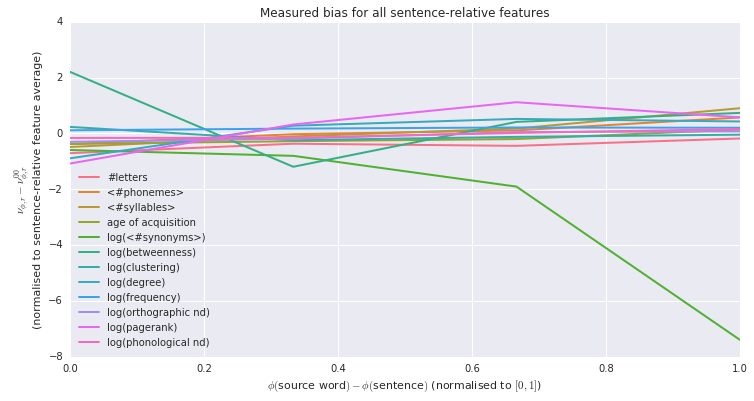

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

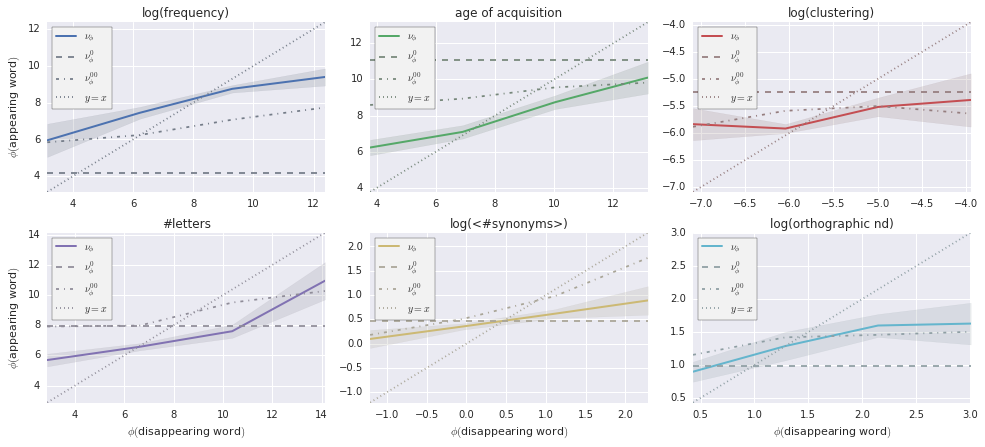

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

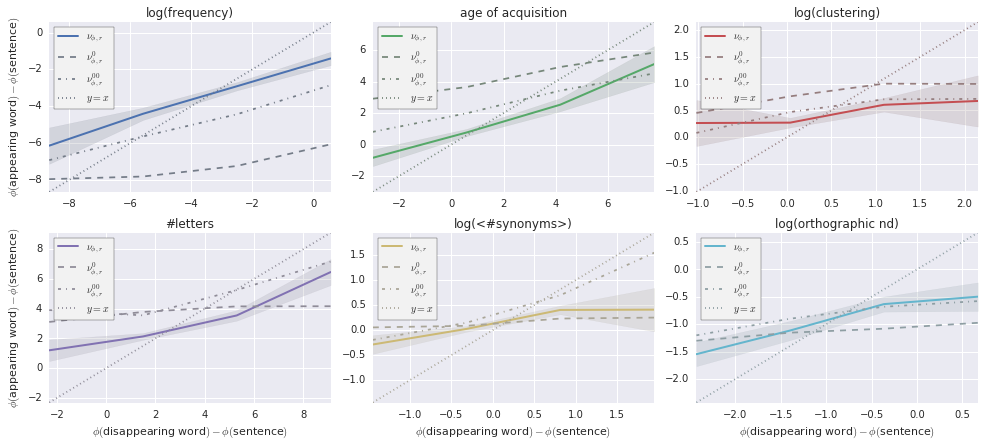

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

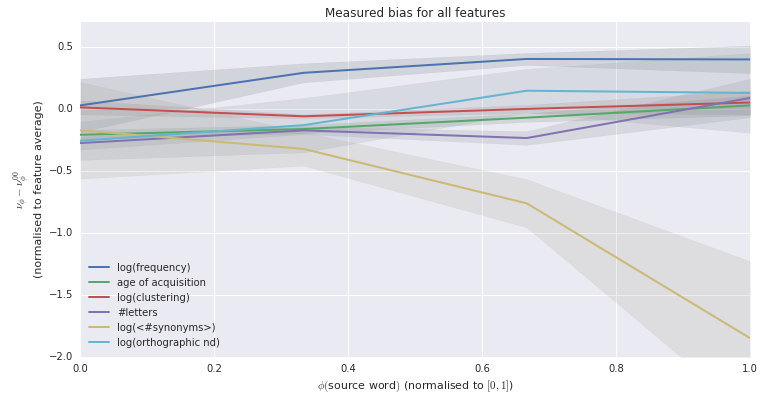

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

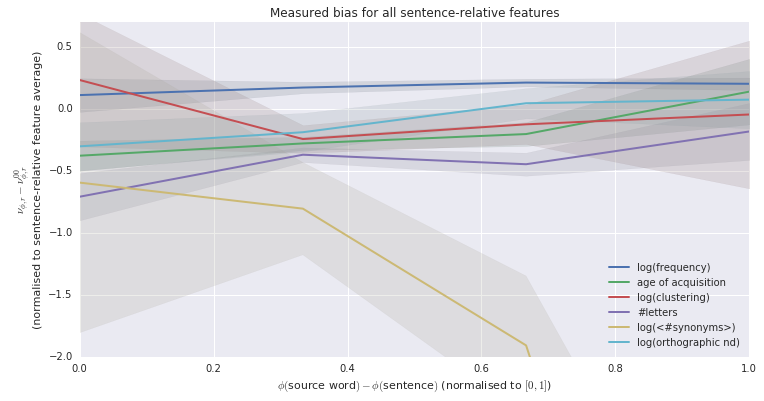

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


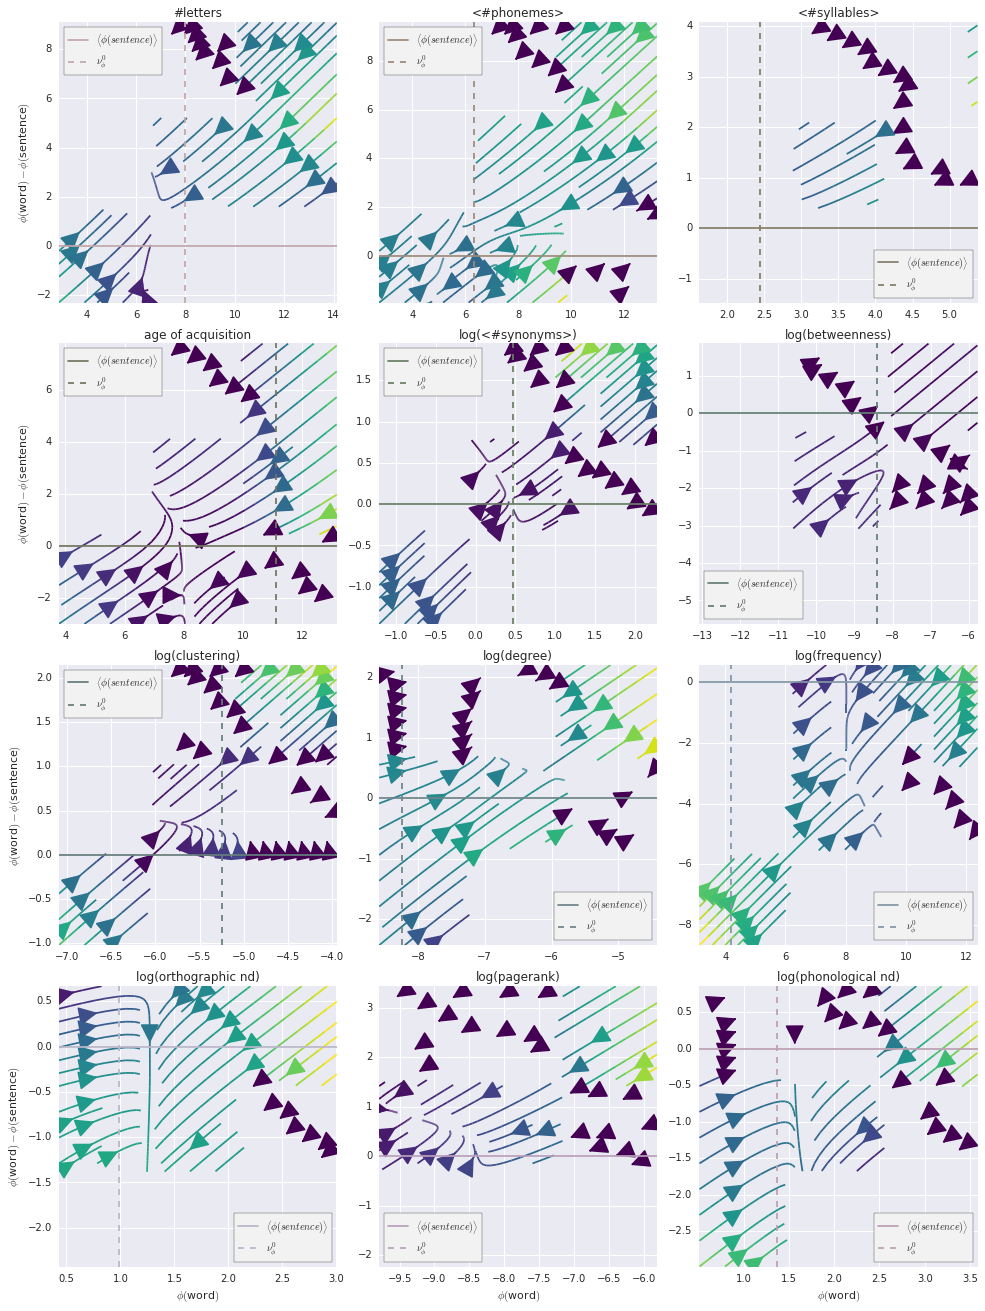

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


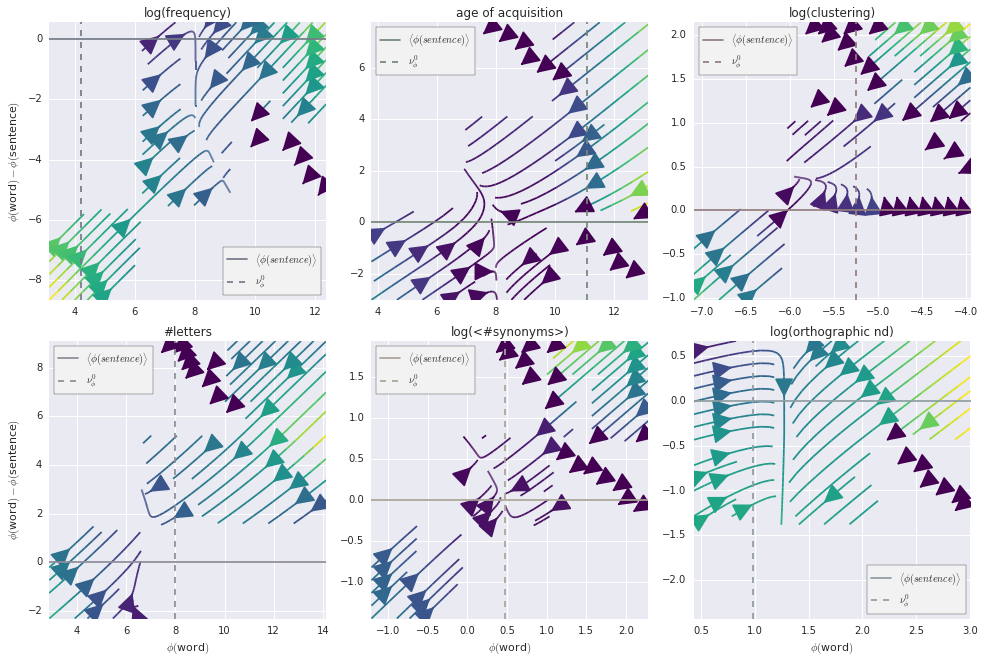

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54601438  0.15938617  0.08145657  0.07174038  0.03516331  0.02791302
  0.02146007  0.01836326  0.01624824  0.01029141  0.00737022]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.492463,0.294978,-0.101583,0.244914,0.251340,-0.418117,0.213284,0.268325,-0.377521,0.280270,-0.153406,0.008792
Component-1,-0.339265,0.351267,-0.093073,0.273678,0.231802,0.420829,-0.161448,0.310660,0.481343,-0.249358,0.173202,-0.025981
Component-2,-0.652011,-0.154437,0.035430,-0.073182,-0.725758,0.046095,0.008336,-0.081155,0.022628,-0.078460,0.014312,0.045194


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 6318) |             | Elapsed Time: 0:00:46 ETA:  3 days, 10:04:13

  1% (  79 of 6318) |                      | Elapsed Time: 0:00:47 ETA:  0:00:21

  2% ( 158 of 6318) |                      | Elapsed Time: 0:00:48 ETA:  0:00:18

  3% ( 237 of 6318) |                      | Elapsed Time: 0:00:49 ETA:  0:00:17

  5% ( 316 of 6318) |#                     | Elapsed Time: 0:00:50 ETA:  0:00:16

  6% ( 395 of 6318) |#                     | Elapsed Time: 0:00:51 ETA:  0:00:17

  7% ( 474 of 6318) |#                     | Elapsed Time: 0:00:51 ETA:  0:00:16

  8% ( 553 of 6318) |#                     | Elapsed Time: 0:00:52 ETA:  0:00:16

 10% ( 632 of 6318) |##                    | Elapsed Time: 0:00:53 ETA:  0:00:17

 11% ( 711 of 6318) |##                    | Elapsed Time: 0:00:54 ETA:  0:00:16

 12% ( 790 of 6318) |##                    | Elapsed Time: 0:00:55 ETA:  0:00:16

 13% ( 869 of 6318) |###                   | Elapsed Time: 0:00:56 ETA:  0:00:15

 15% ( 948 of 6318) |###                   | Elapsed Time: 0:00:57 ETA:  0:00:14

 16% (1027 of 6318) |###                   | Elapsed Time: 0:00:58 ETA:  0:00:15

 17% (1106 of 6318) |###                   | Elapsed Time: 0:00:59 ETA:  0:00:12

 18% (1185 of 6318) |####                  | Elapsed Time: 0:00:59 ETA:  0:00:11

 20% (1264 of 6318) |####                  | Elapsed Time: 0:01:00 ETA:  0:00:08

 21% (1343 of 6318) |####                  | Elapsed Time: 0:01:01 ETA:  0:00:05

 22% (1422 of 6318) |####                  | Elapsed Time: 0:01:02 ETA:  0:00:01

 23% (1501 of 6318) |#####                 | Elapsed Time: 0:01:02 ETA:  0:00:00

 25% (1580 of 6318) |#####                 | Elapsed Time: 0:01:03 ETA:  0:00:00

 26% (1659 of 6318) |#####                 | Elapsed Time: 0:01:04 ETA:  0:00:00

 27% (1738 of 6318) |######                | Elapsed Time: 0:01:05 ETA:  0:00:00

 28% (1817 of 6318) |######                | Elapsed Time: 0:01:05 ETA:  0:00:00

 30% (1896 of 6318) |######                | Elapsed Time: 0:01:06 ETA:  0:00:00

 31% (1975 of 6318) |######                | Elapsed Time: 0:01:07 ETA:  0:00:00

 32% (2054 of 6318) |#######               | Elapsed Time: 0:01:07 ETA:  0:00:00

 33% (2133 of 6318) |#######               | Elapsed Time: 0:01:08 ETA:  0:00:00

 35% (2212 of 6318) |#######               | Elapsed Time: 0:01:09 ETA:  0:00:00

 36% (2291 of 6318) |#######               | Elapsed Time: 0:01:09 ETA:  0:00:00

 37% (2370 of 6318) |########              | Elapsed Time: 0:01:10 ETA:  0:00:00

 38% (2449 of 6318) |########              | Elapsed Time: 0:01:11 ETA:  0:00:00

 40% (2528 of 6318) |########              | Elapsed Time: 0:01:11 ETA:  0:00:00

 41% (2607 of 6318) |#########             | Elapsed Time: 0:01:12 ETA:  0:00:00

 42% (2686 of 6318) |#########             | Elapsed Time: 0:01:13 ETA:  0:00:00

 43% (2765 of 6318) |#########             | Elapsed Time: 0:01:14 ETA:  0:00:00

 45% (2844 of 6318) |#########             | Elapsed Time: 0:01:14 ETA:  0:00:00

 46% (2923 of 6318) |##########            | Elapsed Time: 0:01:15 ETA:  0:00:00

 47% (3002 of 6318) |##########            | Elapsed Time: 0:01:16 ETA:  0:00:00

 48% (3081 of 6318) |##########            | Elapsed Time: 0:01:17 ETA:  0:00:00

 50% (3159 of 6318) |###########           | Elapsed Time: 0:01:18 ETA:  0:00:00

 51% (3238 of 6318) |###########           | Elapsed Time: 0:01:19 ETA:  0:00:00

 52% (3317 of 6318) |###########           | Elapsed Time: 0:01:20 ETA:  0:00:00

 53% (3396 of 6318) |###########           | Elapsed Time: 0:01:20 ETA:  0:00:00

 55% (3475 of 6318) |############          | Elapsed Time: 0:01:21 ETA:  0:00:00

 56% (3554 of 6318) |############          | Elapsed Time: 0:01:22 ETA:  0:00:00

 57% (3633 of 6318) |############          | Elapsed Time: 0:01:23 ETA:  0:00:00

 58% (3712 of 6318) |############          | Elapsed Time: 0:01:24 ETA:  0:00:00

 60% (3791 of 6318) |#############         | Elapsed Time: 0:01:24 ETA:  0:00:00

 61% (3870 of 6318) |#############         | Elapsed Time: 0:01:25 ETA:  0:00:00

 62% (3949 of 6318) |#############         | Elapsed Time: 0:01:26 ETA:  0:00:00

 63% (4028 of 6318) |##############        | Elapsed Time: 0:01:27 ETA:  0:00:00

 65% (4107 of 6318) |##############        | Elapsed Time: 0:01:28 ETA:  0:00:00

 66% (4186 of 6318) |##############        | Elapsed Time: 0:01:29 ETA:  0:00:00

 67% (4265 of 6318) |##############        | Elapsed Time: 0:01:29 ETA:  0:00:00

 68% (4344 of 6318) |###############       | Elapsed Time: 0:01:30 ETA:  0:00:00

 70% (4423 of 6318) |###############       | Elapsed Time: 0:01:31 ETA:  0:00:00

 71% (4502 of 6318) |###############       | Elapsed Time: 0:01:32 ETA:  0:00:00

 72% (4581 of 6318) |###############       | Elapsed Time: 0:01:32 ETA:  0:00:00

 73% (4660 of 6318) |################      | Elapsed Time: 0:01:33 ETA:  0:00:00

 75% (4739 of 6318) |################      | Elapsed Time: 0:01:34 ETA:  0:00:00

 76% (4818 of 6318) |################      | Elapsed Time: 0:01:34 ETA:  0:00:00

 77% (4897 of 6318) |#################     | Elapsed Time: 0:01:35 ETA:  0:00:00

 78% (4976 of 6318) |#################     | Elapsed Time: 0:01:36 ETA:  0:00:00

 80% (5055 of 6318) |#################     | Elapsed Time: 0:01:37 ETA:  0:00:00

 81% (5134 of 6318) |#################     | Elapsed Time: 0:01:38 ETA:  0:00:00

 82% (5213 of 6318) |##################    | Elapsed Time: 0:01:38 ETA:  0:00:00

 83% (5292 of 6318) |##################    | Elapsed Time: 0:01:39 ETA:  0:00:00

 85% (5371 of 6318) |##################    | Elapsed Time: 0:01:40 ETA:  0:00:00

 86% (5450 of 6318) |##################    | Elapsed Time: 0:01:41 ETA:  0:00:00

 87% (5529 of 6318) |###################   | Elapsed Time: 0:01:41 ETA:  0:00:00

 88% (5608 of 6318) |###################   | Elapsed Time: 0:01:42 ETA:  0:00:00

 90% (5687 of 6318) |###################   | Elapsed Time: 0:01:43 ETA:  0:00:00

 91% (5766 of 6318) |####################  | Elapsed Time: 0:01:43 ETA:  0:00:00

 92% (5845 of 6318) |####################  | Elapsed Time: 0:01:44 ETA:  0:00:00

 93% (5924 of 6318) |####################  | Elapsed Time: 0:01:45 ETA:  0:00:00

 95% (6003 of 6318) |####################  | Elapsed Time: 0:01:46 ETA:  0:00:00

 96% (6082 of 6318) |##################### | Elapsed Time: 0:01:46 ETA:  0:00:00

 97% (6161 of 6318) |##################### | Elapsed Time: 0:01:47 ETA:  0:00:00

 98% (6240 of 6318) |##################### | Elapsed Time: 0:01:48 ETA:  0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:01:48 Time: 0:01:48


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

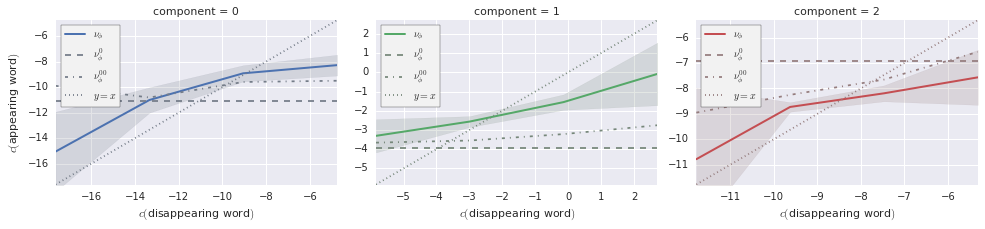

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.58971212  0.16369769  0.14452055]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.703221,-0.108124,0.304752,-0.566653,0.282422,0.007580
Component-1,0.328596,0.141446,-0.624839,-0.651011,0.240072,0.012001
Component-2,-0.613497,0.004634,-0.706496,0.339496,-0.083558,0.047154


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 6318) |                     | Elapsed Time: 0:00:13 ETA:  23:10:30

  1% (  79 of 6318) |                      | Elapsed Time: 0:00:13 ETA:  0:00:46

  2% ( 158 of 6318) |                      | Elapsed Time: 0:00:14 ETA:  0:00:42

  3% ( 237 of 6318) |                      | Elapsed Time: 0:00:15 ETA:  0:00:41

  5% ( 316 of 6318) |#                     | Elapsed Time: 0:00:16 ETA:  0:00:40

  6% ( 395 of 6318) |#                     | Elapsed Time: 0:00:16 ETA:  0:00:41

  7% ( 474 of 6318) |#                     | Elapsed Time: 0:00:17 ETA:  0:00:41

  8% ( 553 of 6318) |#                     | Elapsed Time: 0:00:18 ETA:  0:00:41

 10% ( 632 of 6318) |##                    | Elapsed Time: 0:00:19 ETA:  0:00:42

 11% ( 711 of 6318) |##                    | Elapsed Time: 0:00:20 ETA:  0:00:42

 12% ( 790 of 6318) |##                    | Elapsed Time: 0:00:20 ETA:  0:00:41

 13% ( 869 of 6318) |###                   | Elapsed Time: 0:00:21 ETA:  0:00:40

 15% ( 948 of 6318) |###                   | Elapsed Time: 0:00:22 ETA:  0:00:40

 16% (1027 of 6318) |###                   | Elapsed Time: 0:00:23 ETA:  0:00:40

 17% (1106 of 6318) |###                   | Elapsed Time: 0:00:23 ETA:  0:00:38

 18% (1185 of 6318) |####                  | Elapsed Time: 0:00:24 ETA:  0:00:37

 20% (1264 of 6318) |####                  | Elapsed Time: 0:00:25 ETA:  0:00:35

 21% (1343 of 6318) |####                  | Elapsed Time: 0:00:25 ETA:  0:00:32

 22% (1422 of 6318) |####                  | Elapsed Time: 0:00:26 ETA:  0:00:30

 23% (1501 of 6318) |#####                 | Elapsed Time: 0:00:27 ETA:  0:00:28

 25% (1580 of 6318) |#####                 | Elapsed Time: 0:00:27 ETA:  0:00:28

 26% (1659 of 6318) |#####                 | Elapsed Time: 0:00:28 ETA:  0:00:26

 27% (1738 of 6318) |######                | Elapsed Time: 0:00:29 ETA:  0:00:24

 28% (1817 of 6318) |######                | Elapsed Time: 0:00:29 ETA:  0:00:24

 30% (1896 of 6318) |######                | Elapsed Time: 0:00:30 ETA:  0:00:22

 31% (1975 of 6318) |######                | Elapsed Time: 0:00:31 ETA:  0:00:20

 32% (2054 of 6318) |#######               | Elapsed Time: 0:00:31 ETA:  0:00:19

 33% (2133 of 6318) |#######               | Elapsed Time: 0:00:32 ETA:  0:00:18

 35% (2212 of 6318) |#######               | Elapsed Time: 0:00:32 ETA:  0:00:18

 36% (2291 of 6318) |#######               | Elapsed Time: 0:00:33 ETA:  0:00:16

 37% (2370 of 6318) |########              | Elapsed Time: 0:00:34 ETA:  0:00:15

 38% (2449 of 6318) |########              | Elapsed Time: 0:00:34 ETA:  0:00:15

 40% (2528 of 6318) |########              | Elapsed Time: 0:00:35 ETA:  0:00:14

 41% (2607 of 6318) |#########             | Elapsed Time: 0:00:36 ETA:  0:00:15

 42% (2686 of 6318) |#########             | Elapsed Time: 0:00:37 ETA:  0:00:15

 43% (2765 of 6318) |#########             | Elapsed Time: 0:00:37 ETA:  0:00:15

 45% (2844 of 6318) |#########             | Elapsed Time: 0:00:38 ETA:  0:00:14

 46% (2923 of 6318) |##########            | Elapsed Time: 0:00:38 ETA:  0:00:13

 47% (3002 of 6318) |##########            | Elapsed Time: 0:00:39 ETA:  0:00:13

 48% (3081 of 6318) |##########            | Elapsed Time: 0:00:40 ETA:  0:00:14

 50% (3159 of 6318) |###########           | Elapsed Time: 0:00:41 ETA:  0:00:15

 51% (3238 of 6318) |###########           | Elapsed Time: 0:00:41 ETA:  0:00:14

 52% (3317 of 6318) |###########           | Elapsed Time: 0:00:42 ETA:  0:00:13

 53% (3396 of 6318) |###########           | Elapsed Time: 0:00:43 ETA:  0:00:12

 55% (3475 of 6318) |############          | Elapsed Time: 0:00:44 ETA:  0:00:13

 56% (3554 of 6318) |############          | Elapsed Time: 0:00:44 ETA:  0:00:13

 57% (3633 of 6318) |############          | Elapsed Time: 0:00:45 ETA:  0:00:13

 58% (3712 of 6318) |############          | Elapsed Time: 0:00:46 ETA:  0:00:12

 60% (3791 of 6318) |#############         | Elapsed Time: 0:00:46 ETA:  0:00:10

 61% (3870 of 6318) |#############         | Elapsed Time: 0:00:47 ETA:  0:00:07

 62% (3949 of 6318) |#############         | Elapsed Time: 0:00:48 ETA:  0:00:08

 63% (4028 of 6318) |##############        | Elapsed Time: 0:00:49 ETA:  0:00:08

 65% (4107 of 6318) |##############        | Elapsed Time: 0:00:49 ETA:  0:00:08

 66% (4186 of 6318) |##############        | Elapsed Time: 0:00:50 ETA:  0:00:08

 67% (4265 of 6318) |##############        | Elapsed Time: 0:00:51 ETA:  0:00:07

 68% (4344 of 6318) |###############       | Elapsed Time: 0:00:52 ETA:  0:00:06

 70% (4423 of 6318) |###############       | Elapsed Time: 0:00:52 ETA:  0:00:06

 71% (4502 of 6318) |###############       | Elapsed Time: 0:00:53 ETA:  0:00:04

 72% (4581 of 6318) |###############       | Elapsed Time: 0:00:54 ETA:  0:00:03

 73% (4660 of 6318) |################      | Elapsed Time: 0:00:54 ETA:  0:00:01

 75% (4739 of 6318) |################      | Elapsed Time: 0:00:55 ETA:  0:00:00

 76% (4818 of 6318) |################      | Elapsed Time: 0:00:55 ETA:  0:00:00

 77% (4897 of 6318) |#################     | Elapsed Time: 0:00:56 ETA:  0:00:00

 78% (4976 of 6318) |#################     | Elapsed Time: 0:00:57 ETA:  0:00:00

 80% (5055 of 6318) |#################     | Elapsed Time: 0:00:57 ETA:  0:00:00

 81% (5134 of 6318) |#################     | Elapsed Time: 0:00:58 ETA:  0:00:00

 82% (5213 of 6318) |##################    | Elapsed Time: 0:00:59 ETA:  0:00:00

 83% (5292 of 6318) |##################    | Elapsed Time: 0:00:59 ETA:  0:00:00

 85% (5371 of 6318) |##################    | Elapsed Time: 0:01:00 ETA:  0:00:00

 86% (5450 of 6318) |##################    | Elapsed Time: 0:01:01 ETA:  0:00:00

 87% (5529 of 6318) |###################   | Elapsed Time: 0:01:01 ETA:  0:00:00

 88% (5608 of 6318) |###################   | Elapsed Time: 0:01:02 ETA:  0:00:00

 90% (5687 of 6318) |###################   | Elapsed Time: 0:01:03 ETA:  0:00:00

 91% (5766 of 6318) |####################  | Elapsed Time: 0:01:03 ETA:  0:00:00

 92% (5845 of 6318) |####################  | Elapsed Time: 0:01:04 ETA:  0:00:00

 93% (5924 of 6318) |####################  | Elapsed Time: 0:01:04 ETA:  0:00:00

 95% (6003 of 6318) |####################  | Elapsed Time: 0:01:05 ETA:  0:00:00

 96% (6082 of 6318) |##################### | Elapsed Time: 0:01:06 ETA:  0:00:00

 97% (6161 of 6318) |##################### | Elapsed Time: 0:01:06 ETA:  0:00:00

 98% (6240 of 6318) |##################### | Elapsed Time: 0:01:07 ETA:  0:00:00

100% (6318 of 6318) |######################| Elapsed Time: 0:01:08 Time: 0:01:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

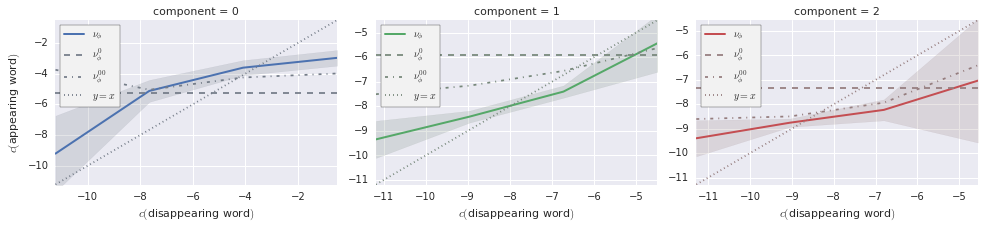

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 698 (cluster-unique) substitutions, but the PCA is in fact computed on 273 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.